# TF Basics
In this notebook we will present some basic Tensorflow concepts.

In [2]:
# Libraries
import tensorflow as tf
print(tf.__version__)

1.13.1


## Constants

In [17]:
hello = tf.constant('Hello ')
world = tf.constant('World')
a = tf.constant(10)
b = tf.constant(20)
type(hello)

tensorflow.python.framework.ops.Tensor

In [18]:
print(hello)

Tensor("Const_18:0", shape=(), dtype=string)


In [20]:
# Not executed until I run it inside a Session
a + b

<tf.Tensor 'add_6:0' shape=() dtype=int32>

## Variables
Variables are changeable parameters of a graph. They need an initial value but they can change during the graph execution. **Typically variables are used for network WEIGHT and BIASES.**

In [50]:
my_randu = tf.random_uniform((4,4), minval=0, maxval=1)
my_var = tf.Variable(my_randu)
print(my_var)

<tf.Variable 'Variable_1:0' shape=(4, 4) dtype=float32_ref>


In [51]:
# Initialize Variables SUPER IMPORTANT OR IT WON'T WORK
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # Run the Variable Initialization
    sess.run(init)
    print(sess.run(my_var))

[[0.57166815 0.9578259  0.7422371  0.33214533]
 [0.9715829  0.40748858 0.5413897  0.97047174]
 [0.45453012 0.88979876 0.8202865  0.14950895]
 [0.5371504  0.76566005 0.09176373 0.6069312 ]]


## Placeholders
They are similar to Variable but they are **initially empty**, since their value is specified at runtime inside a Session using `feed_dic`. They are used to feed in the actual training examples !

**They need a declared data type and they have an optional shape argument.**

In [53]:
ph = tf.placeholder(tf.float32, shape=(4,4))
ph

<tf.Tensor 'Placeholder:0' shape=(4, 4) dtype=float32>

### Np-style operstions
We can do some operations like we do in numpy to create matrices. Remember that no one of this operation is executed until we run it in a session

In [22]:
fill_mat = tf.fill((4,4),10)
my_zeros = tf.zeros((4,4))
my_ones = tf.ones((4,4))
my_randn = tf.random_normal((4,4), mean=0, stddev=1.0)
my_randu = tf.random_uniform((4,4), minval=0, maxval=1)

In [27]:
# As we can see is not executed yet
my_zeros

<tf.Tensor 'zeros:0' shape=(4, 4) dtype=float32>

We can create a list of operations and run all of them in a Session

In [26]:
my_ops = [fill_mat, my_zeros, my_ones, my_randn, my_randu]

## Session
We open a session using the command `with`, in this way we are sure to open a session and we don't need to use a command to close it. We can run an operation using `sess.run` and save the result. We can then print the result outside the session.

**A session allows to execute graphs or part of graphs. It allocates resources (on one or more machines) for that and holds the actual values of intermediate results and variables.**

In [29]:
with tf.Session() as sess:
    # Run an operation
    result = sess.run(hello + world)
    result_2 = sess.run(a+b)
    
    for op in my_ops:
        print(sess.run(op))
        print('\n')

[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


[[ 0.90695     1.1253223   0.5765974  -1.0113598 ]
 [ 0.45220876 -2.7247815  -0.62305945 -0.83909327]
 [ 0.21227948  1.1027718  -1.2341616   1.7621945 ]
 [-0.678888   -0.21226315 -0.8142315   1.6995234 ]]


[[0.9015262  0.03230011 0.66164196 0.27147472]
 [0.50941145 0.6226034  0.5999334  0.9953035 ]
 [0.83804214 0.25434625 0.7311214  0.01993716]
 [0.69228685 0.62297297 0.04654646 0.2732514 ]]




In [16]:
print(result)
print(result_2)

b'Hello World'
30


**(OPTIONAL)** We can also create an interactive session, this is useful only in the notebook, so we won't use it much, but it useful to know about this possibility. Witht he interactive session, we can declare a session and run it in every cell we want

In [28]:
sess_interactive = tf.InteractiveSession()

## Matrix Multiplication

In [30]:
a = tf.constant([[1,2], [3,4]])
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [31]:
b = tf.constant([[10], [100]])
b.get_shape()

TensorShape([Dimension(2), Dimension(1)])

In [33]:
result = tf.matmul(a,b)
result

<tf.Tensor 'MatMul_1:0' shape=(2, 1) dtype=int32>

In [38]:
with tf.Session() as sess:
    print(sess.run(result))

[[210]
 [430]]


# Graph
A graph is a global variable. TensorFlow uses a dataflow graph to
represent your computation in terms of the dependencies between
individual operations. This leads to a low-level programming model in
which you first define the dataflow graph, then create a TensorFlow
session to run parts of the graph across a set of local and remote
devices.
**A graph defines the computation. It doesn’t compute anything, it doesn’t hold any values, it just defines the operations that you specified in your code.**
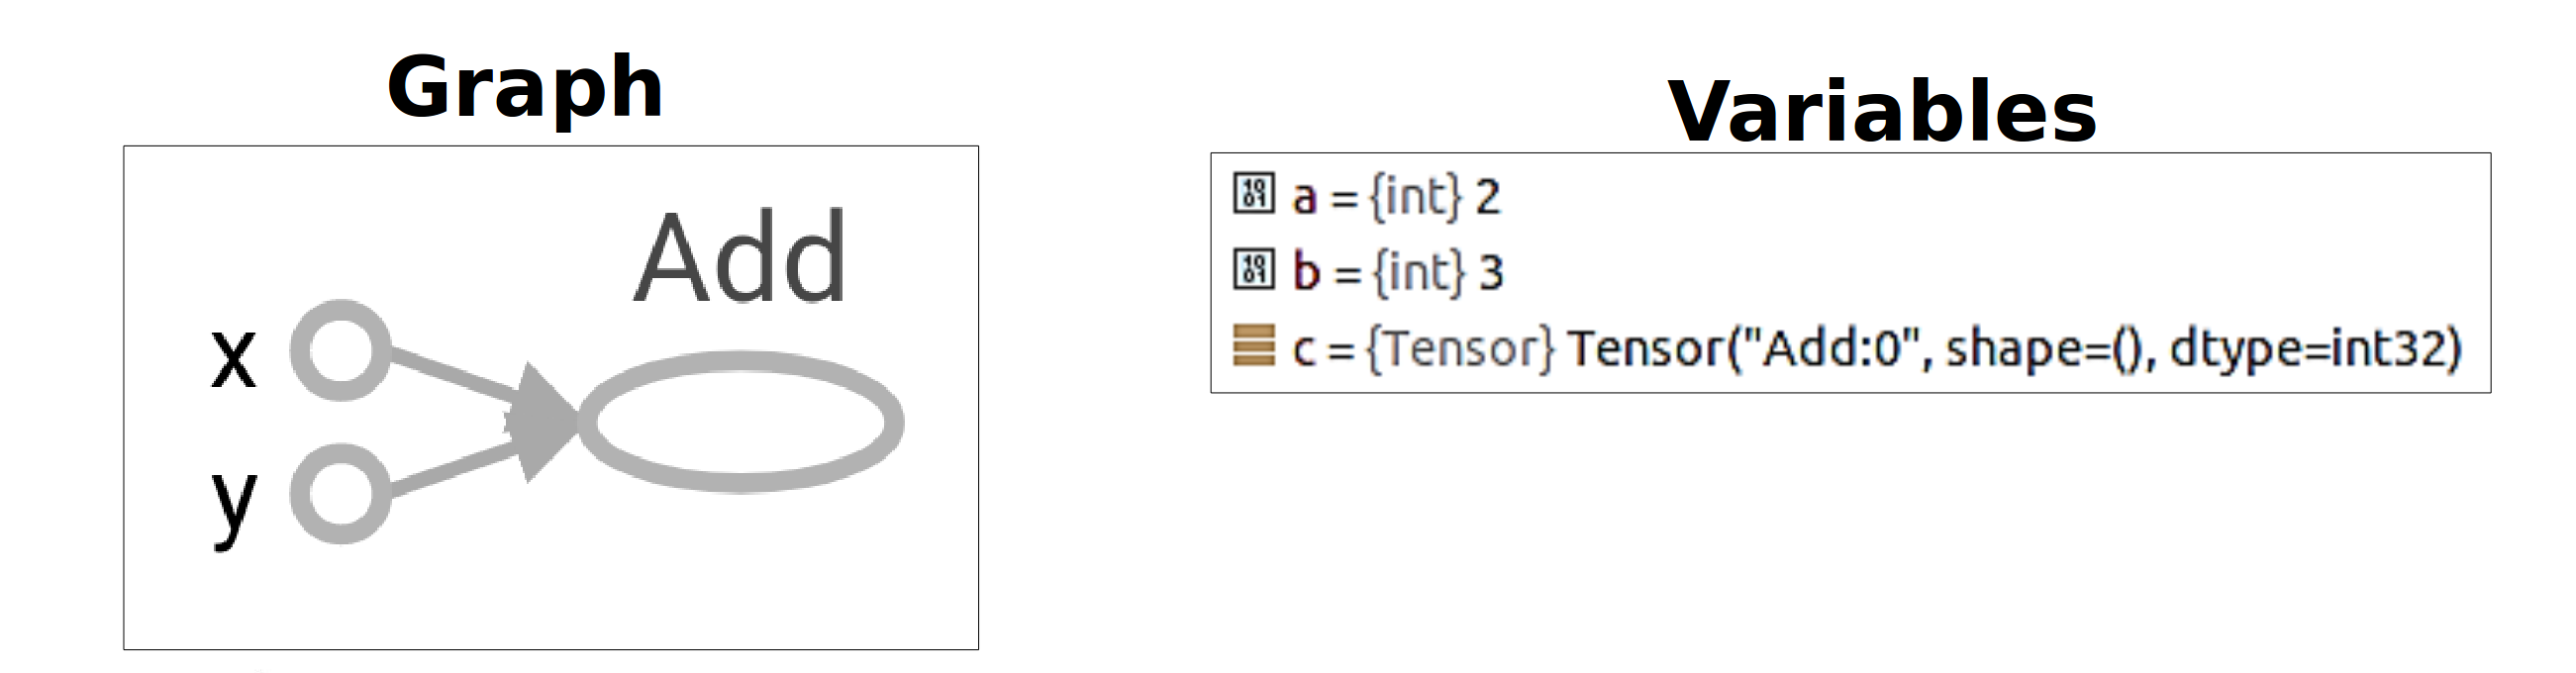

When we start Tensorflow a default graph is created. We can then add additional graphs

In [39]:
x = tf.constant(1)
y = tf.constant(2)
add = x + y
add

<tf.Tensor 'add_9:0' shape=() dtype=int32>

In [41]:
with tf.Session() as sess:
    print(sess.run(add))

3


In [43]:
# Print the deafult graph that is in memory
print(tf.get_default_graph)

<function get_default_graph at 0x111008488>


In [45]:
# Creating a new graph
g = tf.Graph()
print(g)

In [47]:
# Inside the with
with g.as_default():
    print(g is tf.get_default_graph())

True


In [48]:
# Outside the with`
print(g is tf.get_default_graph())

False
